# Predicting Diabetes Using the Perceptron Algorithm: A Machine Learning Approach

## Data Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the path to your dataset
file_path = '/Users/chayonimeu/Documents/GitHub/DLF_Perceptron-to-predict-diabetes/diabetes_scale.txt'

# Load the dataset into a pandas DataFrame (space-separated)
data = pd.read_csv(file_path, delimiter=' ', header=None)

# Inspect the first few rows and the shape of the dataset to understand its structure
print(data.head())  # Display the first few rows
print(f'Dataset shape: {data.shape}')  # Check the dataset dimensions

   0             1            2            3            4            5  \
0 -1   1:-0.294118   2:0.487437   3:0.180328  4:-0.292929         5:-1   
1  1   1:-0.882353  2:-0.145729  3:0.0819672  4:-0.414141         5:-1   
2 -1  1:-0.0588235   2:0.839196  3:0.0491803         4:-1         5:-1   
3  1   1:-0.882353  2:-0.105528  3:0.0819672  4:-0.535354  5:-0.777778   
4 -1          1:-1   2:0.376884  3:-0.344262  4:-0.292929  5:-0.602837   

              6            7             8   9  
0  6:0.00149028   7:-0.53117  8:-0.0333333 NaN  
1   6:-0.207153  7:-0.766866   8:-0.666667 NaN  
2   6:-0.305514  7:-0.492741   8:-0.633333 NaN  
3   6:-0.162444  7:-0.923997          8:-1 NaN  
4     6:0.28465   7:0.887276        8:-0.6 NaN  
Dataset shape: (768, 10)


### Cleaning the Dataset

In [2]:
# Function to clean the feature columns by removing the index prefixes like '1:', '2:', etc.
def clean_data(data):
    cleaned_data = data.applymap(lambda x: float(str(x).split(':')[-1]) if isinstance(x, str) and ':' in x else x)
    return cleaned_data

# Apply the cleaning function to the entire dataset, except the first column (labels)
cleaned_data = clean_data(data.iloc[:, 1:])

# Reattach the label column (first column) to the cleaned dataset
cleaned_data.insert(0, 'Label', data.iloc[:, 0])

# Inspect the cleaned dataset to ensure no data is lost
print(cleaned_data.head())
print(f'Cleaned data shape: {cleaned_data.shape}')

   Label         1         2         3         4         5         6  \
0     -1 -0.294118  0.487437  0.180328 -0.292929 -1.000000  0.001490   
1      1 -0.882353 -0.145729  0.081967 -0.414141 -1.000000 -0.207153   
2     -1 -0.058824  0.839196  0.049180 -1.000000 -1.000000 -0.305514   
3      1 -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444   
4     -1 -1.000000  0.376884 -0.344262 -0.292929 -0.602837  0.284650   

          7         8   9  
0 -0.531170 -0.033333 NaN  
1 -0.766866 -0.666667 NaN  
2 -0.492741 -0.633333 NaN  
3 -0.923997 -1.000000 NaN  
4  0.887276 -0.600000 NaN  
Cleaned data shape: (768, 10)


/var/folders/cl/hsgv1fnd1_v1_4fffg7rml400000gn/T/ipykernel_5914/3481055937.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cleaned_data = data.applymap(lambda x: float(str(x).split(':')[-1]) if isinstance(x, str) and ':' in x else x)


In [3]:
# Remove the last column (column 9) that contains only NaN values
cleaned_data = cleaned_data.drop(columns=[9])

# Verify the result to ensure only the last column has been removed
print(cleaned_data.head())
print(f'Cleaned data shape: {cleaned_data.shape}')  # Should now have 9 columns (1 Label + 8 Features)

   Label         1         2         3         4         5         6  \
0     -1 -0.294118  0.487437  0.180328 -0.292929 -1.000000  0.001490   
1      1 -0.882353 -0.145729  0.081967 -0.414141 -1.000000 -0.207153   
2     -1 -0.058824  0.839196  0.049180 -1.000000 -1.000000 -0.305514   
3      1 -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444   
4     -1 -1.000000  0.376884 -0.344262 -0.292929 -0.602837  0.284650   

          7         8  
0 -0.531170 -0.033333  
1 -0.766866 -0.666667  
2 -0.492741 -0.633333  
3 -0.923997 -1.000000  
4  0.887276 -0.600000  
Cleaned data shape: (768, 9)


### Splitting the Cleaned Dataset

In [4]:
from sklearn.model_selection import train_test_split

# Separate features (X) and labels (y)
X_cleaned = cleaned_data.iloc[:, 1:]  # Features (all columns except the first one)
y_cleaned = cleaned_data['Label']     # Labels (the first column)

# Split the cleaned data into training and test sets (80% training, 20% test)
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Check the dimensions of the cleaned training and test sets
print(f'Cleaned Training set size: {X_train_cleaned.shape}')
print(f'Cleaned Test set size: {X_test_cleaned.shape}')

Cleaned Training set size: (614, 8)
Cleaned Test set size: (154, 8)


### Handling Missing Values

In [5]:
# Check for any missing values in the dataset
print(X_train_cleaned.isna().sum())

# If there are any missing values, handle them using SimpleImputer
from sklearn.impute import SimpleImputer

# Initialize the imputer to fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the training and test sets
X_train_cleaned_imputed = imputer.fit_transform(X_train_cleaned)
X_test_cleaned_imputed = imputer.transform(X_test_cleaned)

1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    8
dtype: int64


## Implementing a Baseline Linear Model

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Train the logistic regression model on the imputed training set
logistic_model.fit(X_train_cleaned_imputed, y_train_cleaned)

# Predict on the imputed test set
y_pred_baseline = logistic_model.predict(X_test_cleaned_imputed)

# Evaluate the baseline model
accuracy_baseline = accuracy_score(y_test_cleaned, y_pred_baseline)
print(f'Baseline Logistic Regression Accuracy: {accuracy_baseline * 100:.2f}%')

# Display classification report for more detailed metrics
print("Classification Report for Baseline Logistic Regression:")
print(classification_report(y_test_cleaned, y_pred_baseline))

Baseline Logistic Regression Accuracy: 75.32%
Classification Report for Baseline Logistic Regression:
              precision    recall  f1-score   support

          -1       0.65      0.65      0.65        55
           1       0.81      0.81      0.81        99

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



## Implementing the Perceptron Algorithm

In [7]:
from sklearn.linear_model import Perceptron

# Initialize the Perceptron model
perceptron_model = Perceptron()

# Train the Perceptron model on the imputed training set
perceptron_model.fit(X_train_cleaned_imputed, y_train_cleaned)

# Predict on the imputed test set
y_pred_perceptron = perceptron_model.predict(X_test_cleaned_imputed)

# Evaluate the Perceptron model
accuracy_perceptron = accuracy_score(y_test_cleaned, y_pred_perceptron)
print(f'Perceptron Algorithm Accuracy: {accuracy_perceptron * 100:.2f}%')

# Display classification report for Perceptron model
print("Classification Report for Perceptron Algorithm:")
print(classification_report(y_test_cleaned, y_pred_perceptron))

Perceptron Algorithm Accuracy: 79.22%
Classification Report for Perceptron Algorithm:
              precision    recall  f1-score   support

          -1       0.76      0.62      0.68        55
           1       0.81      0.89      0.85        99

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



### Hyperparameter Tuning for Perceptron

In [8]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for the Perceptron
param_grid = {
    'max_iter': [1000, 1500, 2000],  # Number of iterations (epochs)
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'eta0': [0.01, 0.1, 1],          # Initial learning rate
    'tol': [1e-3, 1e-4, 1e-5]        # Tolerance for stopping criteria
}

# Initialize the Perceptron model
perceptron_model = Perceptron()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(perceptron_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform the grid search on the training data
grid_search.fit(X_train_cleaned_imputed, y_train_cleaned)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best hyperparameters for Perceptron: {best_params}")
print(f"Best cross-validated accuracy: {best_score * 100:.2f}%")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best hyperparameters for Perceptron: {'alpha': 0.0001, 'eta0': 0.01, 'max_iter': 1000, 'tol': 0.0001}
Best cross-validated accuracy: 73.13%


### Evaluating the Tuned Perceptron Model

In [9]:
# Train the Perceptron model with the best hyperparameters
perceptron_best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_perceptron_best = perceptron_best_model.predict(X_test_cleaned_imputed)

# Evaluate the tuned Perceptron model
accuracy_perceptron_best = accuracy_score(y_test_cleaned, y_pred_perceptron_best)
print(f'Tuned Perceptron Accuracy: {accuracy_perceptron_best * 100:.2f}%')

# Display classification report for tuned Perceptron model
print("Classification Report for Tuned Perceptron:")
print(classification_report(y_test_cleaned, y_pred_perceptron_best))

Tuned Perceptron Accuracy: 79.22%
Classification Report for Tuned Perceptron:
              precision    recall  f1-score   support

          -1       0.76      0.62      0.68        55
           1       0.81      0.89      0.85        99

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



### Cross-Validation; Use a Pipeline to Handle Missing Values and Perceptron

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

# Create a pipeline that imputes missing values and then applies the Perceptron model
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('perceptron', perceptron_best_model)         # Tuned Perceptron model
])

# Perform 5-fold cross-validation using the pipeline
cv_scores = cross_val_score(pipeline, X_cleaned, y_cleaned, cv=5)

# Display the cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean() * 100:.2f}%")

Cross-validation scores: [0.73376623 0.77922078 0.77922078 0.39869281 0.69934641]
Mean cross-validation accuracy: 67.80%


### Class Weighting in Perceptron

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score

# Create a pipeline with an imputer and the Perceptron model
pipeline_weighted = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),   # Impute missing values
    ('perceptron', Perceptron(class_weight='balanced', max_iter=1000, tol=0.0001))  # Perceptron with class weighting
])

# Perform 5-fold cross-validation using the pipeline
cv_scores_weighted = cross_val_score(pipeline_weighted, X_cleaned, y_cleaned, cv=5)

# Display the cross-validation results
print(f"Cross-validation scores with class weighting: {cv_scores_weighted}")
print(f"Mean cross-validation accuracy with class weighting: {cv_scores_weighted.mean() * 100:.2f}%")

Cross-validation scores with class weighting: [0.74025974 0.65584416 0.74675325 0.34640523 0.73202614]
Mean cross-validation accuracy with class weighting: 64.43%


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with scaling, imputation, and Perceptron
pipeline_perceptron = Pipeline(steps=[
    ('scaler', StandardScaler()),                # Standard scaling of features
    ('imputer', SimpleImputer(strategy='mean')), # Handle missing values
    ('perceptron', Perceptron(class_weight='balanced', max_iter=1000, tol=0.0001))
])

# Perform cross-validation
cv_scores_scaled = cross_val_score(pipeline_perceptron, X_cleaned, y_cleaned, cv=5)

# Display results
print(f"Cross-validation scores with scaling: {cv_scores_scaled}")
print(f"Mean cross-validation accuracy with scaling: {cv_scores_scaled.mean() * 100:.2f}%")

Cross-validation scores with scaling: [0.67532468 0.66883117 0.72077922 0.77124183 0.61437908]
Mean cross-validation accuracy with scaling: 69.01%


### Learning Curve

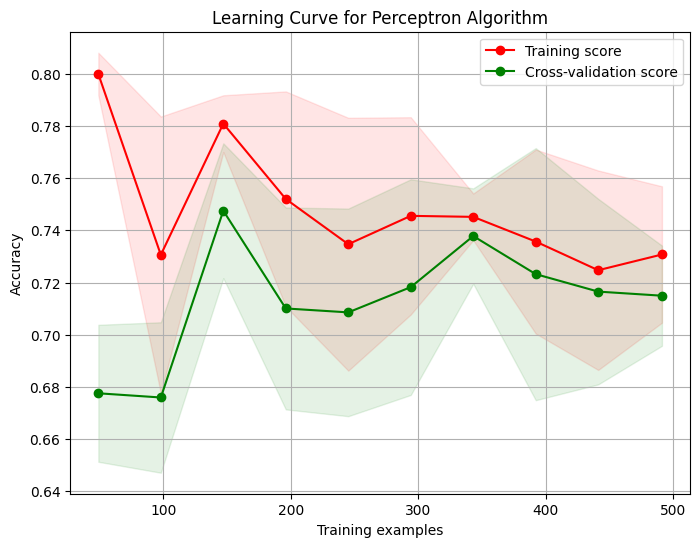

In [17]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Assuming we have already preprocessed and cleaned the data (X_cleaned, y_cleaned)
# Let's say you are using the Perceptron model after tuning
from sklearn.linear_model import Perceptron

# Initialize Perceptron with the best hyperparameters (from grid search)
perceptron_best_model = Perceptron(max_iter=1000, eta0=0.01, alpha=0.0001, tol=0.0001)

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(perceptron_best_model, X_train_cleaned_imputed, y_train_cleaned, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="g", alpha=0.1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve for Perceptron Algorithm")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

### Decision Boundary

<Figure size 800x600 with 0 Axes>

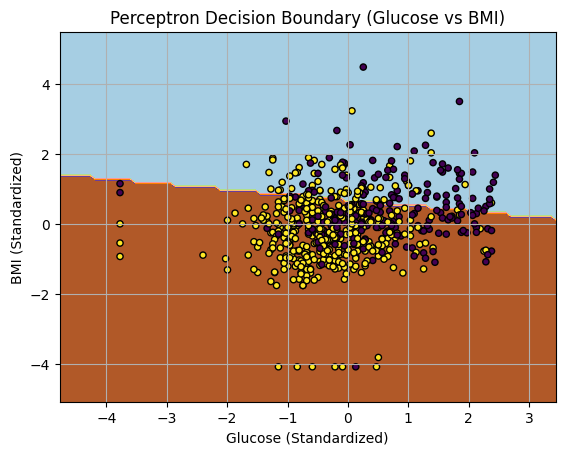

In [18]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler

# Assuming we are using two features (e.g., Glucose and BMI)
X_two_features = X_train_cleaned_imputed[:, [1, 5]]  # Selecting feature indices 1 and 5 as an example

# Standardize the selected features
scaler = StandardScaler()
X_two_features_scaled = scaler.fit_transform(X_two_features)

# Train the Perceptron model on two selected features
perceptron_two_features = Perceptron(max_iter=1000, tol=0.0001, random_state=42)
perceptron_two_features.fit(X_two_features_scaled, y_train_cleaned)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
DecisionBoundaryDisplay.from_estimator(perceptron_two_features, X_two_features_scaled, response_method="predict", cmap=plt.cm.Paired)
plt.scatter(X_two_features_scaled[:, 0], X_two_features_scaled[:, 1], c=y_train_cleaned, edgecolor="k", s=20)
plt.title("Perceptron Decision Boundary (Glucose vs BMI)")
plt.xlabel("Glucose (Standardized)")
plt.ylabel("BMI (Standardized)")
plt.grid()
plt.show()